## BBC News Topic Classifier
- [Data Source](https://www.kaggle.com/competitions/learn-ai-bbc/data?select=BBC+News+Test.csv)
- In this notebook, we will try to predict the news category from the contents of the news body

In [1]:
# import libraries 
import numpy as np
import pandas as pd
import csv

In [22]:
# ## read data

# train_df = pd.read_csv('./BBC_news_data/train.csv')
# train_df.head()

In [2]:
## lets read the file

with open('./BBC_news_data/train.csv', 'r') as csvfile:
    line = csvfile.readline()
    
    print('First line : {}'.format(line))
    line = csvfile.readline()
    print('Second line : {}'.format(line))

First line : ArticleId,Text,Category

Second line : 1833,worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness.  cynthia cooper  worldcom s ex-head of internal accounting  alerted directors to irregular accounting practices at the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn (Â£5.7bn) accounting fraud. mr ebbers has pleaded not guilty to charges of fraud and conspiracy.  prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom  ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates. but ms cooper  who now runs her own consulting business  told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002. she said andersen had given a  green light 

In [3]:
## lets write a function to remove stop_words from the text

def remove_stopwords(text):
    
    # convert text into lower case first
    text = text.lower()
    
    # split the input text and create a list
    text_list = text.split(' ')
    
    # List of stopwords
    stop_words = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
    
    final_text = []
    for word in text_list:
        if word not in stop_words:
            final_text.append(word)
            
    text_list = ' '.join(final_text)
    return text_list

In [4]:
# test
# Test your function
remove_stopwords("I am about to go to the store and get any snack")

'go store get snack'

## Reading the raw data

In [39]:
def get_labels_sentences(filename):
    
    labels =[]
    sentences = []

    with open(filename, 'r') as file:

        reader = csv.reader(file, delimiter = ',')
        
        for row in reader:
            labels.append(row[2])
            text = remove_stopwords(row[1])
            sentences.append(text)

        labels = labels[1:]
        sentences = sentences[1:]

        return labels, sentences

In [40]:
# get labels and sentences
labels, sentences = get_labels_sentences('./BBC_news_data/train.csv')

In [41]:
# check the labels and sentences

print('There are {} sentences'.format(len(sentences)))
print('First sentence : {}'.format(sentences[0]))
print('There are {} labels'.format(len(labels)))
print('First five labels : {}'.format(labels[:5]))      

There are 1490 sentences
First sentence : worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers battery fraud charges called company whistleblower first witness.  cynthia cooper  worldcom s ex-head internal accounting  alerted directors irregular accounting practices us telecoms giant 2002. warnings led collapse firm following discovery $11bn (â£5.7bn) accounting fraud. mr ebbers pleaded not guilty charges fraud conspiracy.  prosecution lawyers argued mr ebbers orchestrated series accounting tricks worldcom  ordering employees hide expenses inflate revenues meet wall street earnings estimates. ms cooper  now runs consulting business  told jury new york wednesday external auditors arthur andersen approved worldcom s accounting early 2001 2002. said andersen given  green light  procedures practices used worldcom. mr ebber s lawyers said unaware fraud  arguing auditors not alert problems.  ms cooper also said shareholder meetings mr ebbers often passed te

In [42]:
print(len(sentences))
print(len(labels))

1490
1490


### Split the data into Train and Test
- I'm using 80% data for training and 20% for testing

In [43]:
train_size = int(0.8 * len(sentences))
print(train_size)

1192


In [44]:
## split data

train_data = sentences[:train_size]
train_labels = labels[:train_size]

test_data = sentences[train_size:]
test_labels = labels[train_size:]

In [45]:
print(len(train_data))
print(len(train_labels))
print(len(test_data))
print(len(test_labels))

1192
1192
298
298


In [30]:
# # Convert the type of labels in numpy array

# import numpy as np

# train_labels = np.array(train_labels)
# test_labels = np.array(test_labels)

In [46]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [103]:
num_words = 10000
oov_token = '<OOV>'
padding_type = 'post'
trunc_type = 'post'
embedding_dim = 16
max_len = 120

In [104]:
## write function to initialize the token

def initialize_token(sentence):
    
    token = Tokenizer(num_words=num_words, oov_token=oov_token)
    
    # this has to be fit on all the words in the corpus
    token.fit_on_texts(sentence)
    
    return token

In [105]:
# this tokenizer should be fitted on training data
tokenizer = initialize_token(train_data)

word_index = tokenizer.word_index

In [106]:
print('Total number of words in the corpus : {}'.format(len(word_index)))

Total number of words in the corpus : 22647


In [107]:
## get sequences and paddings

def get_paddings(tokenizer, sentences):
    
    # get sequences first
    sequences = tokenizer.texts_to_sequences(sentences)
    
    # get padded sequences with post padding
    padded_sequence = pad_sequences(sequences, maxlen=max_len, padding=padding_type, truncating=trunc_type)
    
    return padded_sequence

In [108]:
train_padded_sequences = get_paddings(tokenizer, train_data)
test_padded_sequences = get_paddings(tokenizer, test_data)

In [109]:
print('Shape of the train padded sequence :{}'.format(train_padded_sequences.shape))
print('Shape of the test padded sequence :{}'.format(test_padded_sequences.shape))
print('There are total {} number of entries in the train padded sequence'.format(train_padded_sequences.shape[0]))
print('Max length in the train padded sequence : {}'.format(train_padded_sequences.shape[1]))

Shape of the train padded sequence :(1192, 120)
Shape of the test padded sequence :(298, 120)
There are total 1192 number of entries in the train padded sequence
Max length in the train padded sequence : 120


In [110]:
# check first 3 entries of the padded sequences
train_padded_sequences[:3]

array([[1267, 1268,  618, 5000, 1070, 2340, 2257,  126, 1267,  147, 5417,
        1632, 3172,  655,  674,  163,   60,    1,   14, 4024,    1, 3173,
        1267,    2, 1268,  505, 3564, 1547, 8899, 1350, 8900, 1547, 4025,
          11, 1664,  567,  521, 3782,  542, 2258,   57,  296, 5418, 4311,
        1750, 2417, 1547,  655,    6, 1632, 2418,    5, 1071,  674,  655,
        4633, 3025, 2340, 1072,    6, 1632,    1,  299, 1547, 7632, 1267,
        8901, 1915, 3565, 4026, 6710, 1751,  603, 1985,  568, 1224, 2419,
         456, 3173,   19, 1633, 4312,  154,   29, 4313,    9,  516,  533,
        3372, 4314, 5989, 8902, 2185, 1267,    2, 1547,  220,  493,  521,
           3, 8902,  206, 1048,  967, 5001, 4025,   87, 1267,    6,    1,
           2, 2340,    3, 5002,  655, 4027, 4314,    5, 2638,  321],
       [ 739,  154,  792,    1,  739,  154,  792,  656,  355, 5419,  689,
           1, 1194,  151,    2,  657,  128, 5420,  174,  233, 1867, 6713,
           3,  792, 1437,  656, 2883,  111,

In [111]:
## get the sequences and word index for the labels

def tokenize_labels(tokenizer, all_labels, label):

    tokenizer.fit_on_texts(all_labels)
    
#     label_word_index = token.word_index

    label_sequences = tokenizer.texts_to_sequences(label)
    
    return label_sequences # label_word_index, 

In [112]:
label_tokenizer = Tokenizer()

In [113]:
# train label sequences
train_label_sequences = tokenize_labels(label_tokenizer, labels, train_labels)

# test label sequences
test_label_sequences = tokenize_labels(label_tokenizer, labels, test_labels)

In [114]:
## need to minus 1 because tensorflow tokenizers indexing starts from 1 and not from 0
## this will cause to add an extra index value-
# this can either be solve by adding + 1 value at the output layer in the model creation OR this way by removing
# 1 from each array value

train_label_sequences = np.array(train_label_sequences) - 1
test_label_sequences = np.array(test_label_sequences) - 1

In [115]:
print(len(train_label_sequences))
print(len(test_label_sequences))

1192
298


In [116]:
# check label word index
# check unique number of classes

pd.Series(labels).unique()

array(['business', 'tech', 'politics', 'sport', 'entertainment'],
      dtype=object)

## Train the model

In [117]:
import tensorflow as tf

In [118]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length = max_len),
    tf.keras.layers.GlobalAveragePooling1D(),
    
    tf.keras.layers.Dense(8, activation ='relu'),
    tf.keras.layers.Dense(5,activation = 'softmax')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 120, 16)           160000    
                                                                 
 global_average_pooling1d_6   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_12 (Dense)            (None, 8)                 136       
                                                                 
 dense_13 (Dense)            (None, 5)                 45        
                                                                 
Total params: 160,181
Trainable params: 160,181
Non-trainable params: 0
_________________________________________________________________


In [119]:
num_epochs = 10

model.fit(train_padded_sequences,
          train_label_sequences,
          epochs=num_epochs,
          validation_data=(test_padded_sequences, test_label_sequences))

Epoch 1/10
38/38 [==============================] - 1s 14ms/step - loss: 1.6024 - accuracy: 0.4287 - val_loss: 1.5921 - val_accuracy: 0.5940
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 1.5684 - accuracy: 0.7424 - val_loss: 1.5551 - val_accuracy: 0.6779
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 1.5086 - accuracy: 0.7911 - val_loss: 1.4932 - val_accuracy: 0.7349
Epoch 4/10
38/38 [==============================] - 0s 7ms/step - loss: 1.4157 - accuracy: 0.8465 - val_loss: 1.4013 - val_accuracy: 0.7987
Epoch 5/10
38/38 [==============================] - 0s 6ms/step - loss: 1.2885 - accuracy: 0.8674 - val_loss: 1.2796 - val_accuracy: 0.8456
Epoch 6/10
38/38 [==============================] - 0s 6ms/step - loss: 1.1327 - accuracy: 0.9396 - val_loss: 1.1409 - val_accuracy: 0.8758
Epoch 7/10
38/38 [==============================] - 0s 7ms/step - loss: 0.9656 - accuracy: 0.9681 - val_loss: 0.9945 - val_accuracy: 0.9060
Epoch 8/10
38/38 [=

## Visualize and plot the metrics

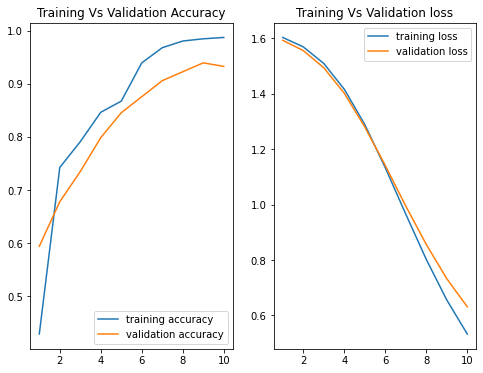

In [120]:
import matplotlib.pyplot as plt

metrics = pd.DataFrame(model.history.history)
epoch_range = range(1, len(metrics) + 1)

plt.figure(figsize=(8,6))

plt.subplot(1,2,1)
plt.plot(epoch_range, metrics['accuracy'],label = 'training accuracy')
plt.plot(epoch_range, metrics['val_accuracy'],label = 'validation accuracy')
plt.title('Training Vs Validation Accuracy')
plt.legend(loc='best')

plt.subplot(1,2,2)
plt.plot(epoch_range, metrics['loss'],label = 'training loss')
plt.plot(epoch_range, metrics['val_loss'],label = 'validation loss')
plt.title('Training Vs Validation loss')
plt.legend(loc='best')

In [ ]:
# Build
encoder = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
    corpus_generator, target_vocab_size=2**15)
encoder.save_to_file(vocab_fname)